In [1]:
import json
import pandas as pd
import numpy as np
import time
import datetime
import dateutil.parser 
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.integrate import quad
from scipy.optimize import curve_fit
import glob
import inspect
import os
import seaborn as sns

In [2]:
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-',':', '--', '-.']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
markerstyles = ["o", "s", "^", "p", "v", "d", "*", "<", ">", "+","3"]
colors = ['blue', 'orange', 'green', 'red']
colors2 = [ 'black','cyan', 'magenta','brown']

data_gt = np.loadtxt(os.path.join(os.getcwd(), 'star/thermo.dat'))


In [3]:
data_gt

array([[ 1.0000264e+07,  3.1142118e+02,  9.1672844e+04, ...,
         7.9851294e-01, -9.6447395e+02,  1.9354958e+03],
       [ 1.0001000e+07,  3.1145400e+02,  9.1673456e+04, ...,
         7.9850761e-01, -9.9266789e+02,  1.9076075e+03],
       [ 1.0002000e+07,  3.0465596e+02,  9.1674288e+04, ...,
         7.9850036e-01, -9.3027826e+02,  1.9066935e+03],
       ...,
       [ 2.1698000e+08,  3.0785158e+02,  9.5816499e+04, ...,
         7.6398067e-01, -7.5253031e+02,  2.1141992e+03],
       [ 2.1699000e+08,  3.1007343e+02,  9.5814086e+04, ...,
         7.6399990e-01, -8.0051368e+02,  2.0869058e+03],
       [ 2.1700000e+08,  3.1054633e+02,  9.5811673e+04, ...,
         7.6401914e-01, -8.2391926e+02,  2.0679039e+03]])

## 1) Density Plot

* set xlab('Steps')
* set ylab('Density')
* plot 'thermo.dat' u 1:5, 0.8026   #STAR OLD
* plot 'thermo.dat' u 1:5, 0.791   #STAR
* p* lot 'thermo.dat' u 1:5, 0.8100   #SQL

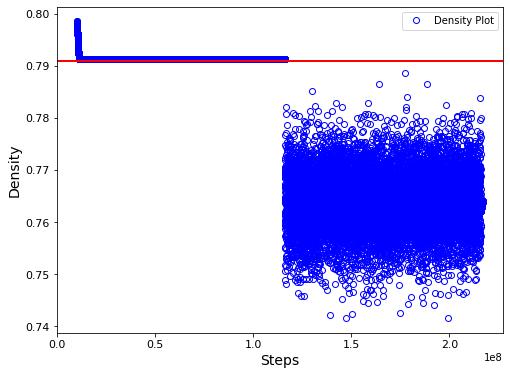

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

label = "Density Plot"
count=0
ax.plot(data_gt[:,0],data_gt[:,4], label=label, marker=markerstyles[count],markerfacecolor='none', 
        linestyle='none', color=colors[count])
ax.axhline(y=0.791, linewidth=2, color='r') #xmin=4, xmax=20,
count += 1
   
ax.legend(ncol=2)
ax.set_xlabel('Steps', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

## 2) Pressure plot

* set xlab('Steps')
* set ylab('Pressure(MPa)')
* plot 'thermo.dat' u 1:($4*0.1), 0.1

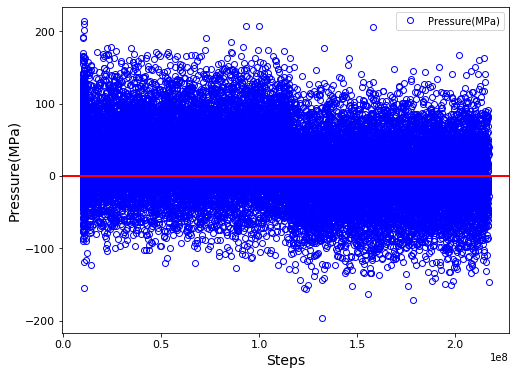

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

label = "Pressure(MPa)"
count=0
ax.plot(data_gt[:,0],data_gt[:,3]*0.1, label=label, marker=markerstyles[count],markerfacecolor='none', 
        linestyle='none', color=colors[count])
ax.axhline(y=0.1, linewidth=2, color='r') #xmin=4, xmax=20,
count += 1
   
ax.legend(ncol=2)
ax.set_xlabel('Steps', fontsize=14)
ax.set_ylabel('Pressure(MPa)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

## 3) Volume plot

* set xlab('Steps')
* set ylab('Volume')
* plot 'thermo.dat' u 1:3

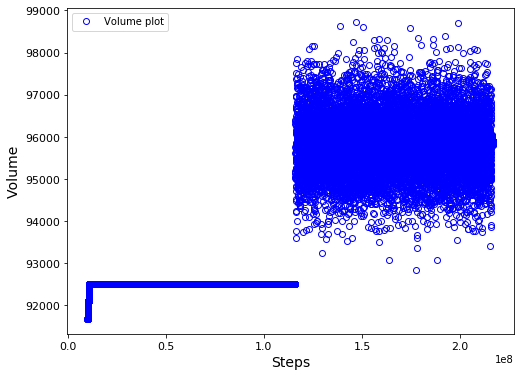

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

label = "Volume plot"
count=0
ax.plot(data_gt[:,0],data_gt[:,2], label=label, marker=markerstyles[count],markerfacecolor='none', 
        linestyle='none', color=colors[count])
count += 1
   
ax.legend(ncol=2)
ax.set_xlabel('Steps', fontsize=14)
ax.set_ylabel('Volume', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

### what is the average pressure and errorbar between two step values?

Step 1: 116000000.0
Step 2: 216000000.0
Avg density = 0.7639690047690463, errorbar = 0.0059130407091402696
Avg Pressure = -0.47124328759868017, errorbar = 47.87879875999573


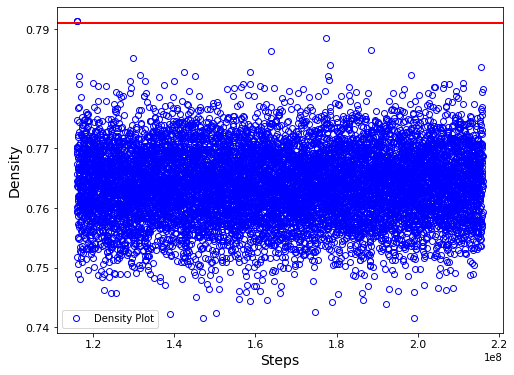

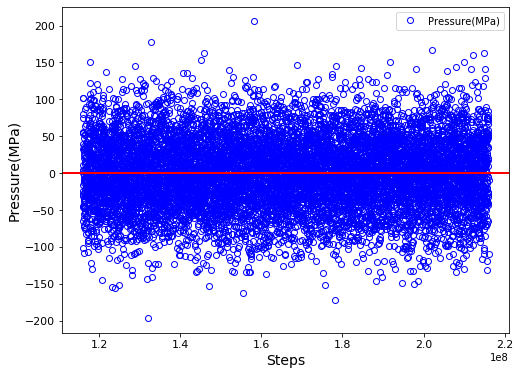

In [8]:
steps = data_gt[:,0]

#idx1 = (np.abs(steps - (steps[0]+1000000))).argmin()
idx1 = (np.abs(steps - (steps[-1]-101000000))).argmin()
print("Step 1: " + str(steps[idx1]))
idx2 = (np.abs(steps - (steps[-1]-1000000))).argmin()
print("Step 2: " + str(steps[idx2]))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

label = "Density Plot"
count=0
ax.plot(data_gt[idx1:idx2,0],data_gt[idx1:idx2,4], label=label, marker=markerstyles[count],markerfacecolor='none', 
        linestyle='none', color=colors[count])
ax.axhline(y=0.791, linewidth=2, color='r') #xmin=4, xmax=20,
count += 1
   
ax.legend(ncol=2)
ax.set_xlabel('Steps', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

print("Avg density = {}, errorbar = {}".format(np.mean(data_gt[idx1:idx2,4]),np.std(data_gt[idx1:idx2,4])))
###############################################################################################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

label = "Pressure(MPa)"
count=0
ax.plot(data_gt[idx1:idx2,0],data_gt[idx1:idx2,3]*0.1, label=label, marker=markerstyles[count],markerfacecolor='none', 
        linestyle='none', color=colors[count])
ax.axhline(y=0.1, linewidth=2, color='r') #xmin=4, xmax=20,
count += 1
   
ax.legend(ncol=2)
ax.set_xlabel('Steps', fontsize=14)
ax.set_ylabel('Pressure(MPa)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

print("Avg Pressure = {}, errorbar = {}".format(np.mean(data_gt[idx1:idx2,3]*0.1),np.std(data_gt[idx1:idx2,3]*0.1)))

###############################################################################################################